# Cosine similarity

In [1]:
#Getting content from Wikipedia
import wikipedia

In [71]:
#Mathematicians
Leonhard = wikipedia.page("Laptop")
Carl = wikipedia.page("PlayStation")
Andrew = wikipedia.page("Television")
Euclid=wikipedia.page("Radio")
Fibonacci = wikipedia.page("Camera")

In [6]:
#football player
Messi = wikipedia.page("Lionel Messi")
Ronaldo = wikipedia.page("Cristiano Ronaldo")
Robben = wikipedia.page("Arjen Robben")
Sunil=wikipedia.page("Sunil Chhetri")
Jeje = wikipedia.page("Jeje Lalpekhlua")

In [8]:
#Space Research Agency
ISRO = wikipedia.page("Indian Space Research Organisation")
NASA = wikipedia.page("NASA")
ESA = wikipedia.page("European Space Agency")
Roscosmos=wikipedia.page("Roscosmos")
JAXA = wikipedia.page("JAXA")

In [16]:
#businessman
Ambani = wikipedia.page("India")
Premji = wikipedia.page("United States")
Warren = wikipedia.page("Russia")
Mark=wikipedia.page("Japan")
Jeff = wikipedia.page("Canada")

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [4]:
import numpy as np

In [5]:
#creating cosine function
def cosine (a,b):
    a=np.array(a)
    b=np.array(b)
    return(np.sum(a*b)/np.sqrt(np.sum(a**2)*np.sum(b**2)))
def euclidean(a,b):
    distance = np.sqrt(np.sum((np.array(a)-np.array(b))**2))   
    return(distance)

In [77]:
X = np.array(cv.fit_transform([
                               Messi.content,Ronaldo.content,Robben.content,Sunil.content,Jeje.content,
                              Ambani.content,Premji.content,Warren.content,Mark.content,Jeff.content,
                              ISRO.content,NASA.content,ESA.content, Roscosmos.content,JAXA.content,
    Leonhard.content,Carl.content,Andrew.content,Euclid.content,Fibonacci.content
                              ]).toarray())

In [78]:
name=[
      "Messi","Ronaldo","Robben","Sunil","Jeje",
      "Ambani","Premji","Warren","Mark","Jeff",
      "ISRO","NASA",'ESA',"Roscosmos","JAXA",
"Leonhard","Carl","Andrew","Euclid","Fibonacci"]

In [79]:
#Clustering

k=[]
for i in range(0,len(X)):
    temp=[]
    te=[]
    for j in range (i+1,len(X)):
        if i not in k: # to avoid condition like dist(1,2) and dist(2,1)
            if j not in k: 
                te.append(i) #temporary storing i value 
                temp.append([cosine(X[i],X[j]),euclidean(X[i],X[j]),i,j]) # temporary storing cosine similarity values
    temp.sort(reverse=True) # to get maximum value of cosine similarity
    te=np.unique(te) #avoid repetition
    if len(te)==1: # to avoid out of range error while appending to k 
        k.append(te[0])
    #mina.append(temp)
    #k.append(te[0])
    if len(temp)>=5: # only considering top 5
        for m in range(4):
            k.append(temp[m][3])
    
for i in range(20):# appending remaining value
    if i not in k:
        k.append(i)
    

In [80]:
#creating list as per the order of k 
names=[]
for i in k:
    names.append(name[i])

### Output

In [81]:
#clusiering is done in this way: [1,2,3,4,5,6,7,8]=>1st cluster=[1,2,3,4] 2nd cluster=[5,6,7,8]
for i in range(0,20,5):
    print(names[i:i+5])

['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Ambani', 'Premji', 'Warren', 'Jeff', 'Mark']
['ISRO', 'NASA', 'Roscosmos', 'JAXA', 'ESA']
['Leonhard', 'Carl', 'Andrew', 'Euclid', 'Fibonacci']


In [82]:
#Original Group
for i in range(0,20,5):
    print(name[i:i+5])

['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Ambani', 'Premji', 'Warren', 'Mark', 'Jeff']
['ISRO', 'NASA', 'ESA', 'Roscosmos', 'JAXA']
['Leonhard', 'Carl', 'Andrew', 'Euclid', 'Fibonacci']


# Agglomerative clustering

In [194]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [196]:
import pandas as pd

In [263]:
data=pd.DataFrame(X)

In [264]:
hclust = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete')

In [265]:
hclust.fit(data)
labels=hclust.labels_

In [266]:
data['Groups'] = hclust.labels_
data["Names"]=name

In [248]:
data

,0,1,2,3,4,5,6,7,8,9,...,11612,11613,11614,11615,11616,11617,11618,11619,Groups,Names
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Leonhard
1,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,Carl
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Andrew
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,Euclid
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,Fibonacci
5,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Messi
6,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ronaldo
7,0,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,Robben
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Sunil
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Jeje


### Output

In [280]:
for i in range(4):
    print(list(data.Names[data.Groups==i]))

['Leonhard', 'Carl', 'Andrew', 'Ambani', 'Premji', 'Warren', 'Mark', 'Jeff']
['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Euclid', 'Fibonacci']
['ISRO', 'NASA', 'ESA', 'Roscosmos', 'JAXA']


# Dendrogram

In [231]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [227]:
Z = linkage(data, 'complete')

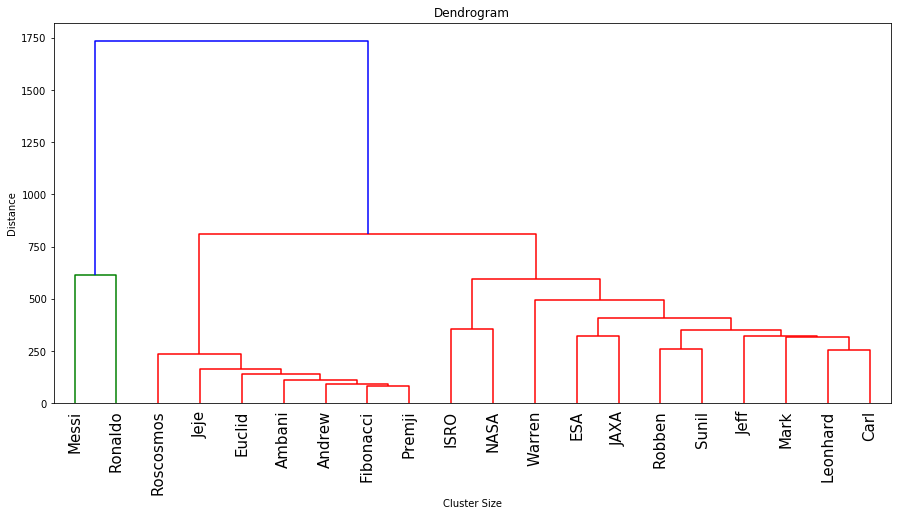

In [282]:
plt.figure(figsize=(15,7))
dendrogram(Z,leaf_rotation=90, leaf_font_size=15,labels=name)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()